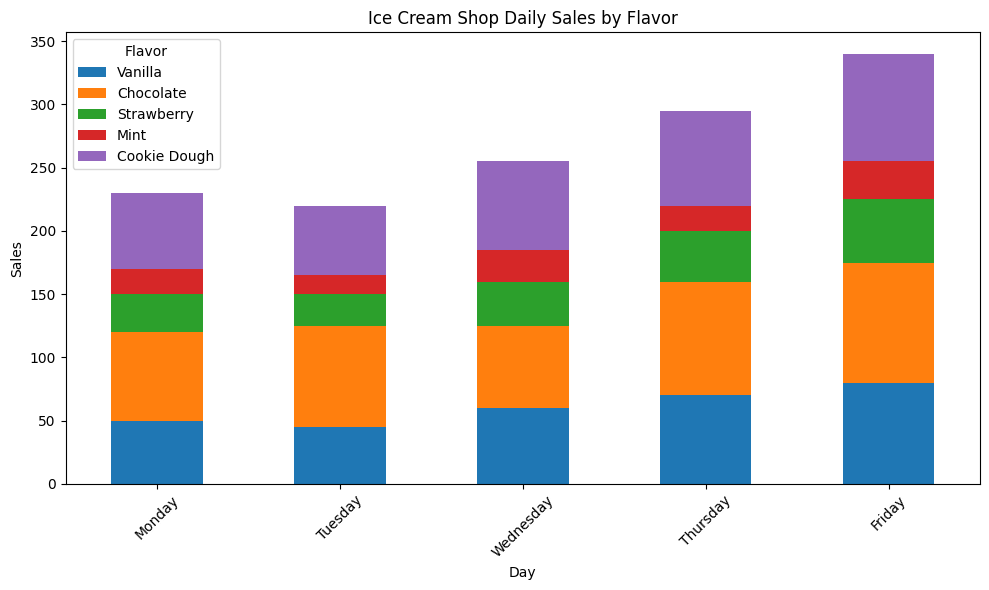

Flavor with highest total sales: Friday
Busiest day for the shop: Friday


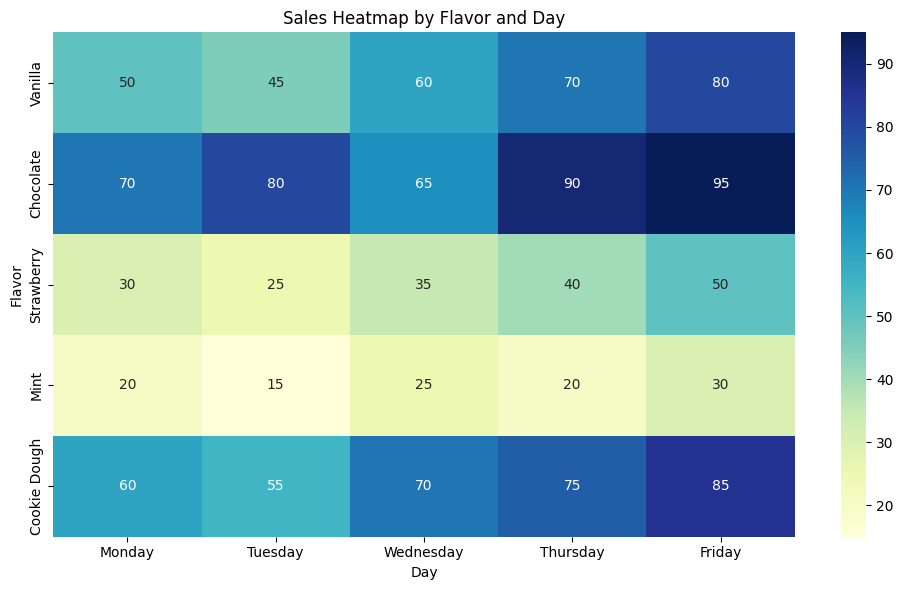

Flavor with most consistent sales: Mint
Flavor with sales spikes: Vanilla


Flavor with largest market share: Chocolate
Flavors that combined make up over 50% of total sales:
Empty DataFrame
Columns: [Flavor, Total Sales]
Index: []


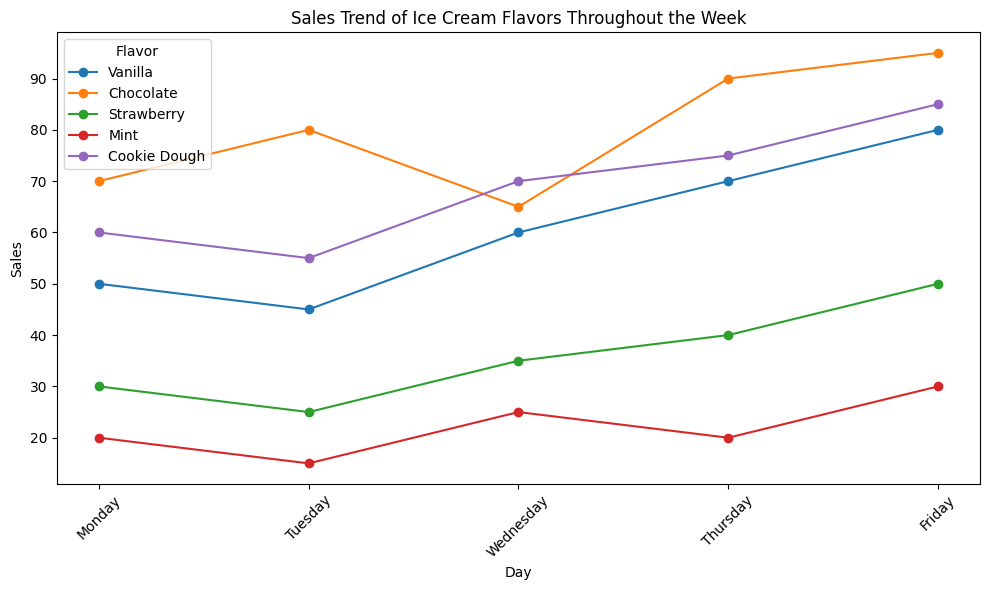

Flavor showing most growth from Monday to Friday: Vanilla
Flavors with decreasing trend: []


In [1]:
# Ice Cream Shop Sales Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sample data
data = {
    'Flavor': ['Vanilla', 'Chocolate', 'Strawberry', 'Mint', 'Cookie Dough'],
    'Monday': [50, 70, 30, 20, 60],
    'Tuesday': [45, 80, 25, 15, 55],
    'Wednesday': [60, 65, 35, 25, 70],
    'Thursday': [70, 90, 40, 20, 75],
    'Friday': [80, 95, 50, 30, 85]
}

df = pd.DataFrame(data)
df.set_index('Flavor', inplace=True)

# 1. Using Matplotlib: Stacked Bar Chart
df.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ice Cream Shop Daily Sales by Flavor')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Flavor')
plt.tight_layout()
plt.show()

# Calculate total sales and busiest day
total_sales = df.sum()
busiest_day = df.sum(axis=0).idxmax()
highest_flavor = total_sales.idxmax()

print(f"Flavor with highest total sales: {highest_flavor}")
print(f"Busiest day for the shop: {busiest_day}")

# 2. Using Seaborn: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Sales Heatmap by Flavor and Day')
plt.xlabel('Day')
plt.ylabel('Flavor')
plt.tight_layout()
plt.show()

# Analyzing consistency and spikes
consistency = df.std(axis=1).idxmin()  # Flavor with the lowest standard deviation
spikes = df.max(axis=1) - df.min(axis=1)  # Calculate spikes
spike_flavor = spikes.idxmax()

print(f"Flavor with most consistent sales: {consistency}")
print(f"Flavor with sales spikes: {spike_flavor}")

# 3. Using Plotly: Interactive Pie Chart
total_sales = df.sum(axis=1).reset_index()
total_sales.columns = ['Flavor', 'Total Sales']

# Create pie chart
fig = px.pie(total_sales, values='Total Sales', names='Flavor', title='Market Share of Ice Cream Flavors')
fig.show()

# Analyzing market share
largest_flavor = total_sales.loc[total_sales['Total Sales'].idxmax(), 'Flavor']
over_50_percent_flavors = total_sales[total_sales['Total Sales'] > (total_sales['Total Sales'].sum() * 0.5)]

print(f"Flavor with largest market share: {largest_flavor}")
print("Flavors that combined make up over 50% of total sales:")
print(over_50_percent_flavors)

# 4. Using Matplotlib: Line Plot
plt.figure(figsize=(10, 6))
for flavor in df.index:
    plt.plot(df.columns, df.loc[flavor], marker='o', label=flavor)
plt.title('Sales Trend of Ice Cream Flavors Throughout the Week')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Flavor')
plt.tight_layout()
plt.show()

# Analyzing growth and trends
growth = df.loc[:, 'Friday'] - df.loc[:, 'Monday']
most_growth_flavor = growth.idxmax()
decreasing_trends = df[df.iloc[:, -1] < df.iloc[:, 0]].index.tolist()

print(f"Flavor showing most growth from Monday to Friday: {most_growth_flavor}")
print(f"Flavors with decreasing trend: {decreasing_trends}")